In [180]:
import pandas as pd
df = pd.read_csv('shapes.txt')

In [181]:
ngv1b = df[df['shape_id'] == 'ngv1b_0']

In [182]:
ngv1b

,shape_id,shape_pt_sequence,shape_pt_lat,shape_dist_traveled,shape_pt_lon
142,ngv1b_0,1,14.067374,0.00,100.608641
143,ngv1b_0,2,14.067494,0.74,100.601740
144,ngv1b_0,3,14.067579,0.75,100.601656
145,ngv1b_0,4,14.070475,1.07,100.601648
146,ngv1b_0,5,14.070452,1.39,100.598722
147,ngv1b_0,6,14.070535,1.40,100.598626
148,ngv1b_0,7,14.071159,1.47,100.598596
149,ngv1b_0,8,14.071232,1.48,100.598548
150,ngv1b_0,9,14.071191,1.61,100.597370
151,ngv1b_0,10,14.071544,1.65,100.597314


In [333]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371000 * c
    return km

def haversine_np_array(pxy):
    EARTH_RADIUS = 6371000
    pxy_rad = np.radians(pxy)
    diff =  np.sin(np.diff(pxy_rad,axis=0)/2) ** 2
    cos_lat = np.cos(pxy_rad[:, 1])
    return 2 * np.arcsin(np.sqrt((diff[:, 1] + cos_lat[:-1] * cos_lat[1:] * diff[:, 0]))) * EARTH_RADIUS


(14.0657426, 14.077905553749266)

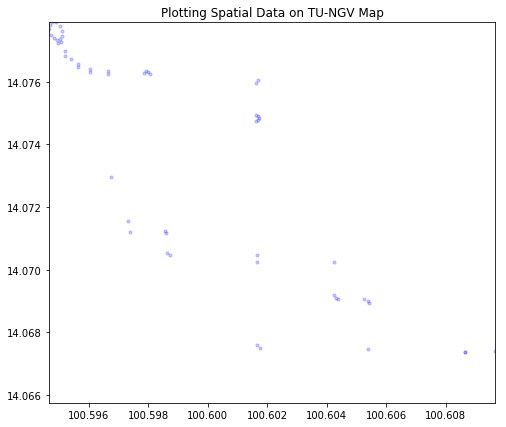

In [184]:
import matplotlib.pyplot as plt

BBox = ((df.shape_pt_lon.min(),   df.shape_pt_lon.max(),      
         df.shape_pt_lat.min(), df.shape_pt_lat.max())
       )
        
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(ngv1b.shape_pt_lon, ngv1b.shape_pt_lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on TU-NGV Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])


In [334]:
import numpy as np

def interpcurve(N,pX,pY):
    #equally spaced in arclength
    N=np.transpose(np.linspace(0,1,N))

    #how many points will be uniformly interpolated?
    nt=N.size

    #number of points on the curve
    n=pX.size
    pxy=np.array((pX,pY)).T
    p1=pxy[0,:]
    pend=pxy[-1,:]
    last_segment= np.linalg.norm(np.subtract(p1,pend))
    epsilon= 10*np.finfo(float).eps

    #IF the two end points are not close enough lets close the curve
    if last_segment > epsilon*np.linalg.norm(np.amax(abs(pxy),axis=0)):
        pxy=np.vstack((pxy,p1))
        nt = nt + 1
    else:
        print('Contour already closed')

    pt=np.zeros((nt,2))

    #Compute the chordal arclength of each segment.
#     chordlen = (np.sum(np.diff(pxy,axis=0)**2,axis=1))**(1/2)
    chordlen = haversine_np_array(pxy)
    #Normalize the arclengths to a unit total
    chordlen = chordlen/np.sum(chordlen)
    #cumulative arclength
    cumarc = np.append(0,np.cumsum(chordlen))

    tbins= np.digitize(N,cumarc) # bin index in which each N is in

    #catch any problems at the ends
    tbins[np.where(tbins<=0 | (N<=0))]=1
    tbins[np.where(tbins >= n | (N >= 1))] = n - 1      

    s = np.divide((N - cumarc[tbins]),chordlen[tbins-1])
    pt = pxy[tbins,:] + np.multiply((pxy[tbins,:] - pxy[tbins-1,:]),(np.vstack([s]*2)).T)

    return pt 

In [381]:
pt = interpcurve(1064, ngv1b.shape_pt_lon, ngv1b.shape_pt_lat )

(14.0657426, 14.077905553749266)

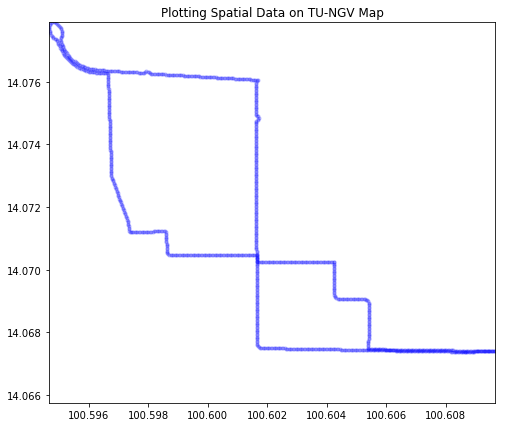

In [382]:
import matplotlib.pyplot as plt

BBox = ((df.shape_pt_lon.min(),   df.shape_pt_lon.max(),      
         df.shape_pt_lat.min(), df.shape_pt_lat.max())
       )
        
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(pt[:,0], pt[:,1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on TU-NGV Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [385]:
start_pt = pt[0]
cum_dist = 0
for i in range(1, pt.shape[0]):
    next_pt = pt[i]
    dist = haversine_np(start_pt[0], start_pt[1], next_pt[0], next_pt[1])
    cum_dist += dist
    start_pt = next_pt
print(cum_dist)

5286.131787444263


In [474]:
noise_x = np.random.normal(1,0.000001,1064)
noise_y = np.random.normal(1,0.000001,1064)
noise = np.vstack((noise_x, noise_y)).T
# np.multiply(pt, noise)
pt_noise = pt * noise
np.random.shuffle(pt_noise)
test_pt = pt_noise[:300]

(14.0657426, 14.077905553749266)

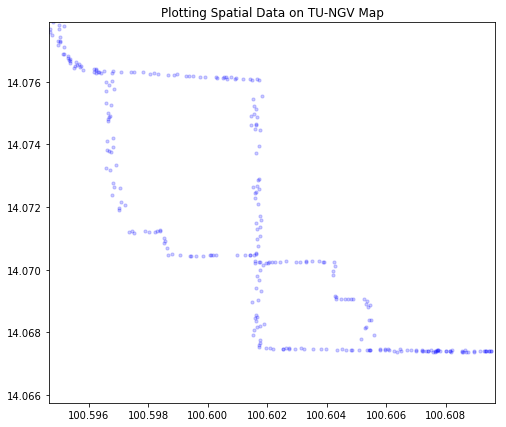

In [475]:
import matplotlib.pyplot as plt

BBox = ((df.shape_pt_lon.min(),   df.shape_pt_lon.max(),      
         df.shape_pt_lat.min(), df.shape_pt_lat.max())
       )
        
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(test_pt[:,0], test_pt[:,1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on TU-NGV Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])